In [1]:
import cv2
from ultralytics import YOLO
import os
import matplotlib.pyplot as plt

In [2]:
def replace_cars_with_white(image_path):
    model = YOLO('yolov8n.pt')
    
    image = cv2.imread(image_path)
    original_image = image.copy()
    
    results = model(image)
    
    for result in results:
        boxes = result.boxes
        for box in boxes:
            if box.cls == 2:
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                
                image[y1:y2, x1:x2] = 255

    plt.figure(figsize=(15, 5))
    
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    plt.title('Исходное изображение')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Изображение с белыми участками')
    plt.axis('off')
    
    plt.show()
    
    return image



0: 480x640 1 car, 35.1ms
Speed: 3.1ms preprocess, 35.1ms inference, 135.0ms postprocess per image at shape (1, 3, 480, 640)


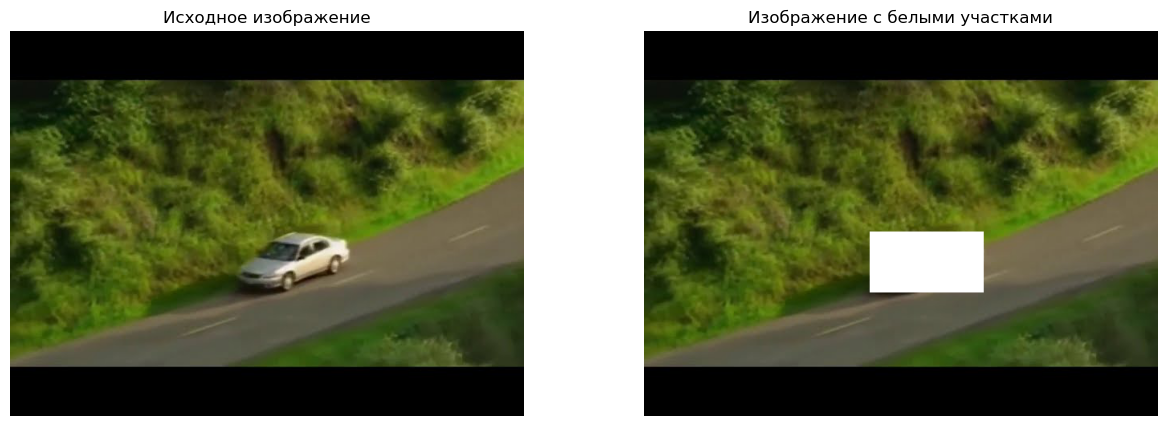

In [3]:
image_paths = [
        'car.jpg',
    ]
    
for image_path in image_paths:
    processed_image = replace_cars_with_white(image_path)

    output_path = f'processed_{os.path.basename(image_path)}'
    cv2.imwrite(output_path, processed_image)